# Uso del Filtro de 9 puntos

In [3]:
import simulacion as s
import numpy as np
import ROOT as root

Welcome to JupyROOT 6.30/04


## Generar distribuciones sin Filtro

In [7]:
N_pix = 64
C_med = 35714
num_cuentas = 10000
nct=20
sizes = [1]
contrasts = [0]
for t in sizes:
    for k in contrasts:
        dist = s.dist_defectos(t,k,N_pix,C_med,num_cuentas,3,11,filtro=0)
        name=s.histogram_name(N_pix,nct,0,t,k)
        print(dist)
        hist=root.TH1D(name,'',400,0.,10.)
        for i in range(len(dist)):
            hist.Fill(dist[i])
        hist.Scale(1/hist.Integral())
        sigma=s.incertidumbre(hist,num_cuentas)
        for i,error in enumerate(sigma,start=1):
            hist.SetBinError(i,error)
        file = root.TFile(name,"RECREATE")
        hist.Write()
        file.Close()

[1.44878321 1.50903519 1.51654193 ... 2.37710646 2.38058771 2.39253343]


## Comparativa curvas ROC

In [58]:
graphs = []

In [59]:
Npix = 64
nct = 20
t = 2
k = 2.5



x,y,xe,ye = s.curvaroc(Npix,nct,t,k,False,0)
roc = root.TGraphErrors(400)
for i in range(400):
    roc.SetPoint(i,x[i],y[i])
    roc.SetPointError(i,xe[i],ye[i])
roc.SetTitle("Receiver Operating Characteristic (ROC)")
roc.GetXaxis().SetTitle("False Positive Rate")
roc.GetYaxis().SetTitle("True Positive Rate")
canvas = root.TCanvas('','',800,600)   
roc.SetMarkerColor(root.kOrange+7)
roc.SetLineColor(root.kOrange+7)
roc.SetMarkerStyle(24)

graphs.append(roc)


In [50]:
legend = root.TLegend(0.6,0.25,0.9,0.55)
legend.SetEntrySeparation(0.05)
legend.SetBorderSize(0)
legend.SetMargin(0.1)
legend.AddEntry(graphs[0],"N=64, nct=5, t=2, k=2")
legend.AddEntry(graphs[1],"N=64, nct=10, t=2, k=2")

legend.SetTextFont(42)  # 42 is the font code for LaTeX-compatible fonts
legend.SetTextSize(0.03)  # Adjust the font size as needed

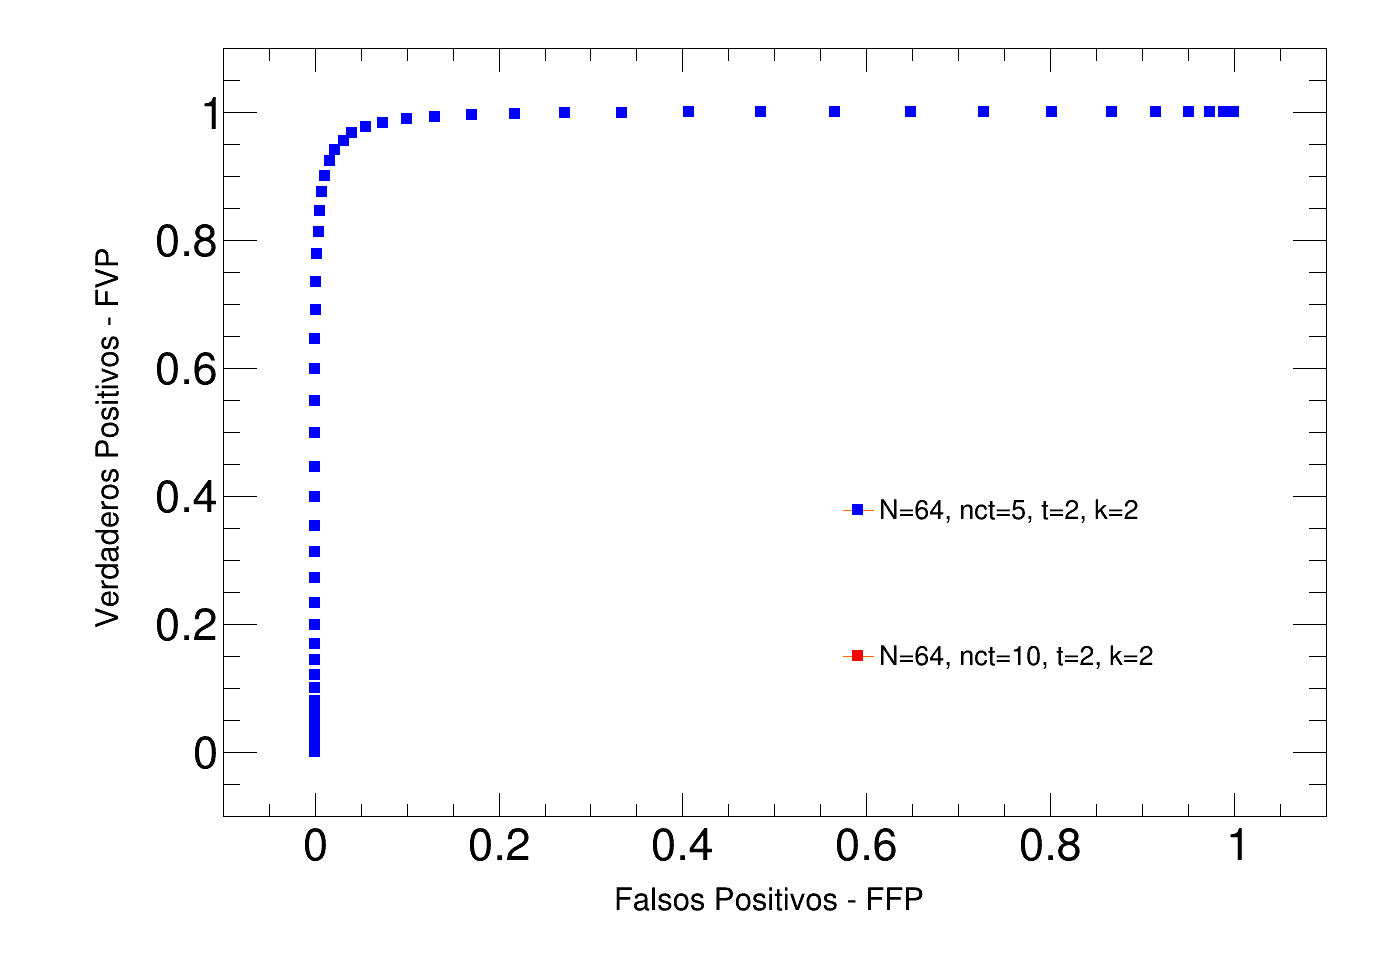

In [60]:
root.gROOT.SetStyle("ATLAS")
root.gROOT.ForceStyle()

# Increase canvas size and set resolution
canvas = root.TCanvas('', '', 1400, 1000)  # Increase width and height for higher resolution

graphs[0].SetTitle("Receiver Operating Characteristic (ROC)")
graphs[0].GetXaxis().SetTitle("Falsos Positivos - FFP")
graphs[0].GetYaxis().SetTitle("Verdaderos Positivos - FVP")
graphs[0].GetXaxis().SetTitleSize(0.035)  # Adjust as needed
graphs[0].GetYaxis().SetTitleSize(0.035)  # Adjust as needed
graphs[0].GetXaxis().CenterTitle()
graphs[0].GetYaxis().CenterTitle()
graphs[0].GetXaxis().SetTitleOffset(1.5) 
graphs[0].GetYaxis().SetTitleOffset(1.5) 
graphs[0].GetXaxis().SetRangeUser(-0.1,1.1)
graphs[0].GetYaxis().SetRangeUser(-0.1,1.1)

graphs[0].SetMarkerColor(root.kBlue)

for i in range(len(graphs)):
    graphs[i].SetMarkerStyle(21)
    graphs[i].SetMarkerSize(1.4)
graphs[0].Draw("APX")


legend.Draw()
canvas.Draw()